In [1]:
%matplotlib notebook

['s_id', 'date', 'door_contact_as', 'living_room_as', 'bedroom_as', 'bed_as', 'bathroom_as', 'kitchen_as']
300925
            timestamp  duration
0 2015-10-01 00:00:08    2912.0
1 2015-10-01 00:48:58      48.0
2 2015-10-01 00:49:58     259.0
3 2015-10-01 00:54:07    4142.0
4 2015-10-01 02:03:19      30.0
           duration
count   8983.000000
mean     298.142937
std     1006.513215
min       14.000000
25%       40.000000
50%       70.000000
75%      179.000000
max    34077.000000


<IPython.core.display.Javascript object>


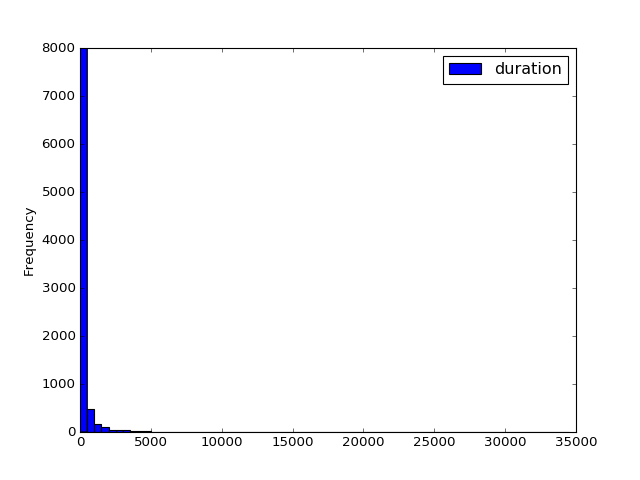

Elasped Time:  11.422 seconds


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

time_now = time.time()
#function to read csv
def read(filename='../Workspace/DATA/SensorReading_2015-10_S001.csv'):
    df = pd.read_csv(filename, delimiter=',', usecols=[x for x in range(0,8)],parse_dates=[1])
    return df

#get dataframe containing readings from sensor reading
df = read()
column_names = list(df.columns.values)
print(column_names)
print(len(df.index))

#extract 'no-activity' periods
df = df.ix[(df['door_contact_as'] == 'No') & (df['living_room_as'] == 'No') 
                   & (df['bedroom_as'] == 'No') & (df['bed_as'] == 'No') 
                   & (df['bathroom_as'] == 'No') & (df['kitchen_as'] == 'No')]
#reset index
df = df.reset_index(drop=True)

#get difference between rows
df['TimeDelta'] = pd.TimedeltaIndex(df['date'].diff().fillna(0))

# print(df)
time_dict = []
startTimeIndex = None
total_sec = 0
for row in df.itertuples():
    startTimeIndex = row[0] if startTimeIndex == None else startTimeIndex
    tdelta = row[9]
    if(row[0] + 1 < len(df.index)):
        if(df.at[row[0] + 1, 'TimeDelta'].total_seconds() > 10):
            startTime = df.at[startTimeIndex, 'date']
            time_dict.append((startTime,total_sec + tdelta.total_seconds()))
            total_sec = 0
            startTimeIndex = row[0] + 1
        else:
            total_sec += tdelta.total_seconds()

#just itertuples also 12+ seconds
# startTimeIndex = None
# for row in df.itertuples():
    
#     startTimeIndex = row[0] if startTimeIndex == None else startTimeIndex
#     timestamp = row[2]
    
#     if (row[0] + 1 < len(df.index)):
#         if (df.at[row[0] + 1, 'date'] - timestamp).total_seconds() > 10:
#             startTime = df.at[startTimeIndex,'date']
#             time_dict.append((startTime , (timestamp - startTime).total_seconds()))
#             startTimeIndex = row[0] + 1
# new_df = pd.Series(time_dict)
                             
new_df = pd.DataFrame(time_dict, columns=['timestamp','duration'])
print(new_df.head())
print(new_df.describe())
binwidth = 500
new_df.plot.hist(bins=np.arange(min(new_df['duration']), max(new_df['duration']) + binwidth, binwidth))
# new_df.to_csv('test.csv')


print("Elasped Time: ", round(time.time() - time_now, 3), "seconds")